# Distributional and frequency effects in word embeddings: Strange geometry
## © 2018 Chris Culy, June 2018
### [chrisculy.net](http://chrisculy.net/)

## Overview

This is one of a [series of posts](dist_freq_intro.html). In this post I examine two of the word vector phenomena discussed in [[1]](#ref1) ("The strange geometry of skip-gram with negative sampling"), namely the distribution of word vectors with respect to the mean and the distributions of values in the dimensions.

### Results and contribution

* These two phenomena from [[1]](#ref1) hold up pretty well across the methods and with these much smaller corpora.
* One place where there is a difference is that very few ppmi dimensions have much skew in their values, unlike the other 3 methods (and the original results)
* Once again, sgns and ft largely pattern together, while glove and ppmi do so as well, but to a lesser extent.

[Download as Jupyter notebook](dist_freq_geometry.ipynb)

[Download supplemental Python code](dfewe.zip)

<input type="checkbox" id="toggleCheck" checked> Show Code

In [1]:
#imports
from dfewe import *

#for tables in Jupyter
from IPython.display import HTML, display
import tabulate

In [2]:
# some utilities
def show_title(t):
    display(HTML('<b>%s</b>' % t))

def show_table(data,headers,title):
    show_title(title)
    display(HTML(tabulate.tabulate(data,tablefmt='html', headers=headers)))
    
#for dynamic links
links = ('<a href="#link%d">Skip down</a>' % i for i in range(100))
anchors = ('<span id="link%d"></span>' % i for i in range(100))

def make_link():
    display(HTML(next(links)))

def make_anchor():
    display(HTML(next(anchors)))

In [3]:
#set up standard corpora + vectors
vfair_all = Setup.make_standard_sampler_and_vecs('vfair',5,100,1) #window=5, dims=100, min_count=1
heartd_all = Setup.make_standard_sampler_and_vecs('heartd',5,100,1) #window=5, dims=100, min_count=1

what = [['Vanity Fair (vfair)'],['Heart of Darkness (heartd)']]
for i,c in enumerate([vfair_all,heartd_all]):
    sampler = c['sampler']
    what[i].extend([sum(sampler.counts.values()), len(sampler.counts)])

show_table(what, headers=['Corpus','Tokens','Types'], title="Corpora sizes")

## Background

[[1]](#ref1) is a nice paper which examines some aspects of the distribution of word vectors in vector space. Although the emphasis of the paper is on skip ngrams with negative sampling (sgns), they also consistently compare sgns with the GLoVe approach. Here I will also include the FastText and PPMI approaches that I have been considering throughout this series of posts. By expanding the number of methods, and by using the small corpora, we can see to what extent the observations from [[1]](#ref1) hold more broadly. As mentioned above, mostly they do.

## Distribution with respect to the mean

The first aspect I'll look at is distribution with respect to the mean. [[1]](#ref1) take the mean of vectors. They then compute the dot products of all the vectors with the mean, and plot the resulting distributions by 4 frequency bands. Their frequency bands are:

<table>
    <tr><th>Frequency range</th><th>Name</th></tr>
    <tr><td>1-100</td><td>ultra hight</td></tr>
    <tr><td>100-500</td><td>high</td></tr>
    <tr><td>500-5000</td><td>moderate</td></tr>
    <tr><td>5000 and up</td><td>low</td></tr>
</table>

What they observe for their large (~70,000 word vocabulary) corpus is that:

* "SGNS vector inner products are all positive, with low-frequency words the most positive"
* "GloVe inner products become positive for low-frequency words and negative for high-frequency words"

Note that since the dot product is the cosine of the angle between the vectors times their lengths, the sign of the distributions, which is what we're interested in, would be the same if we just took the cosine similarity. However, I'll use the dot product to be consistent. (Also note that since I've normalized the vectors, the dot product here is just the cosine similarity scaled by the length of the mean vector.)

Rather than using absolute frequencies for the frequency bands, I'll use percentiles, since this allows for easier comparison across corpora of different sizes. Here I've arbitrarily chose 10 percentiles as the band width.

This is what we get for _Vanity Fair_ (_vfair_) with the 4 different methods.

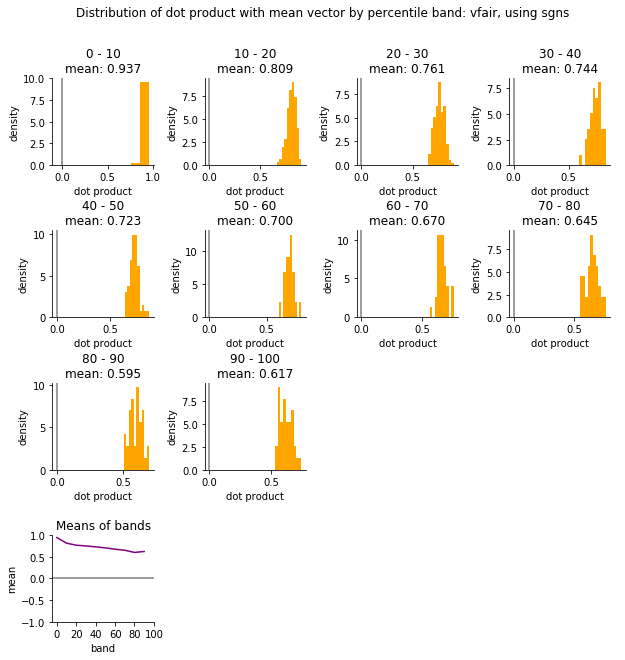

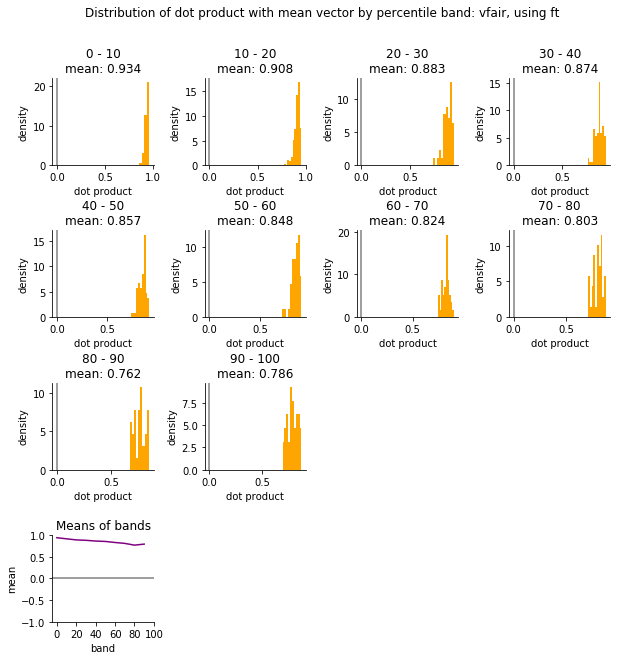

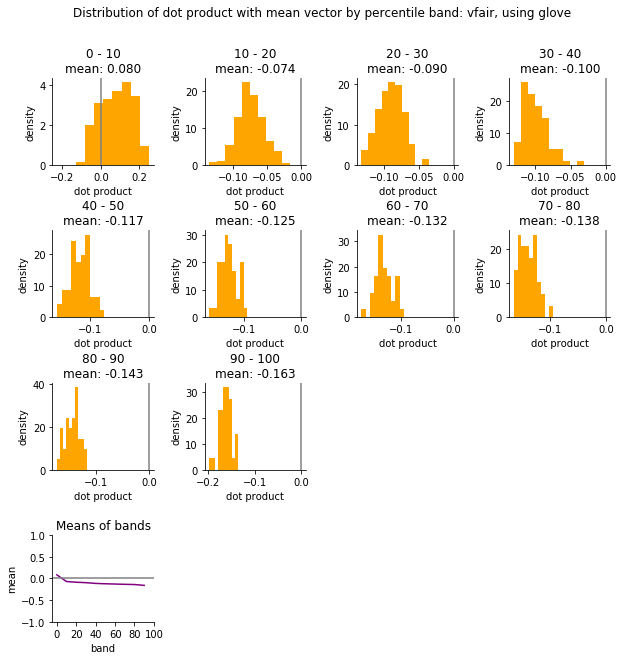

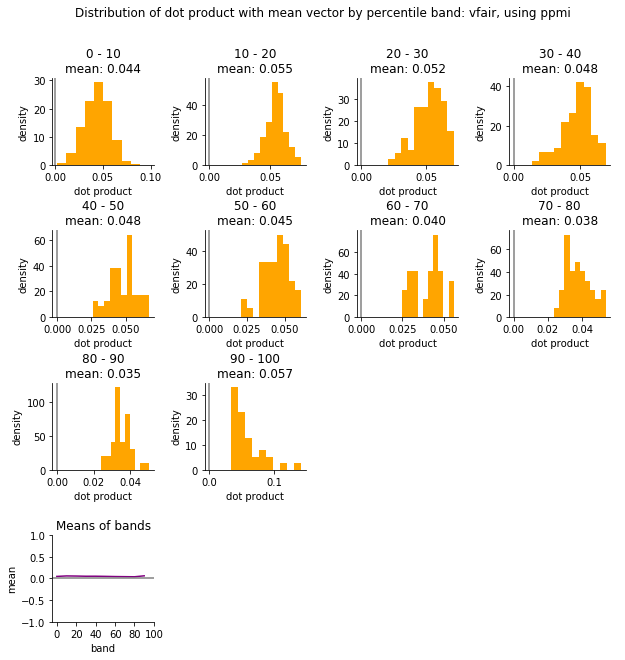

In [4]:
combo = vfair_all
name = 'vfair'

make_link()
VectorCalcs.compare_sims_with_mean(combo,name, step=10)
make_anchor()

What we see is that with respect to vfair, sgns and glove show the same patterns as with the large corpus in [[1]](#ref1). In particular, with sgns the inner products are all positive, and low-frequency words are the most positive, while with glove, the inner products are somewhat positive for lowest-frequency word and negative for the others.

In both [Similarity shifts](dist_freq_sim_shift.html) and [Stratification](dist_freq_stratification.html), we saw sgns and ft behaving similarly, and that is true here as well, but ft is even more positive than sgns. We also previously saw that glove and ppmi often behaved similarly, however here ppmi is only somewhat similar to glove in that the values are close to 0, but they are all positive, unlike glove.

The results for heartd are below. One thing to note is that the blank histograms for sgns and ft are because the variance is close to 0, too small to draw a bar. Other than that, the results show the same pattern as for vfair, only more extreme for ft and ppmi.

**In sum**, the observations from [[1]](#ref1) regarding dot products with the mean vectors hold up pretty well with these smaller corpora. Furthermore, we yet again see sgns and ft showing similar behavior on the one hand and glove and ppmi showing somewhat similar behavior.


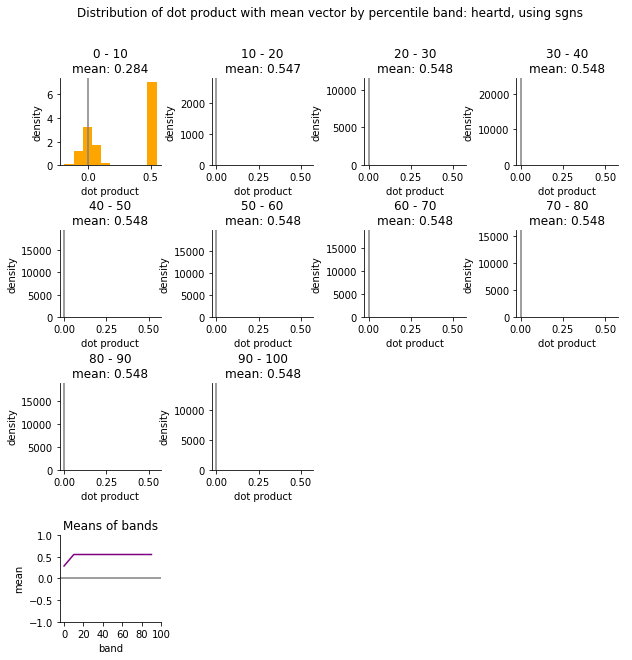

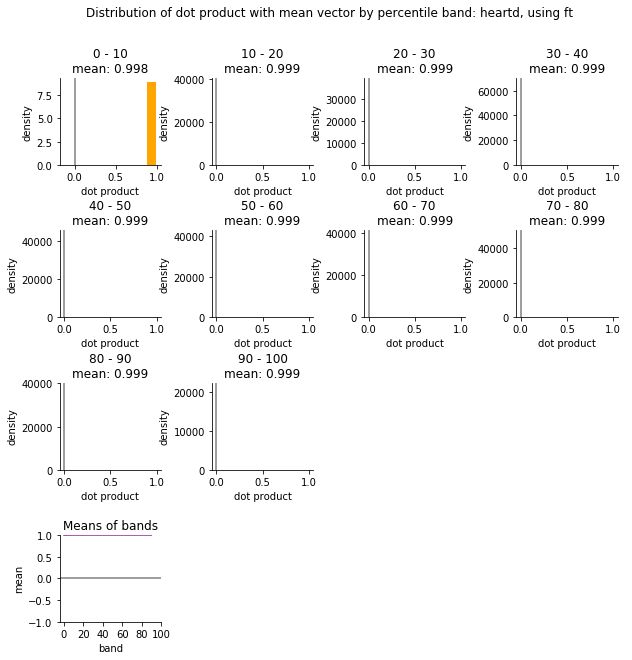

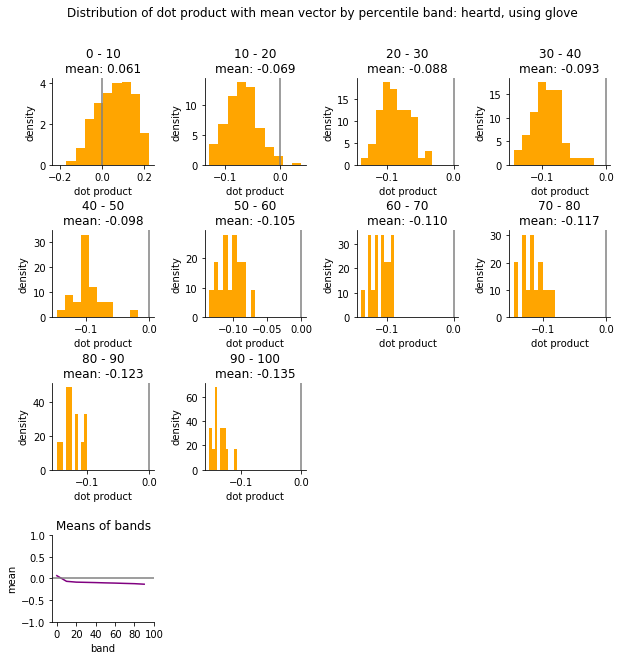

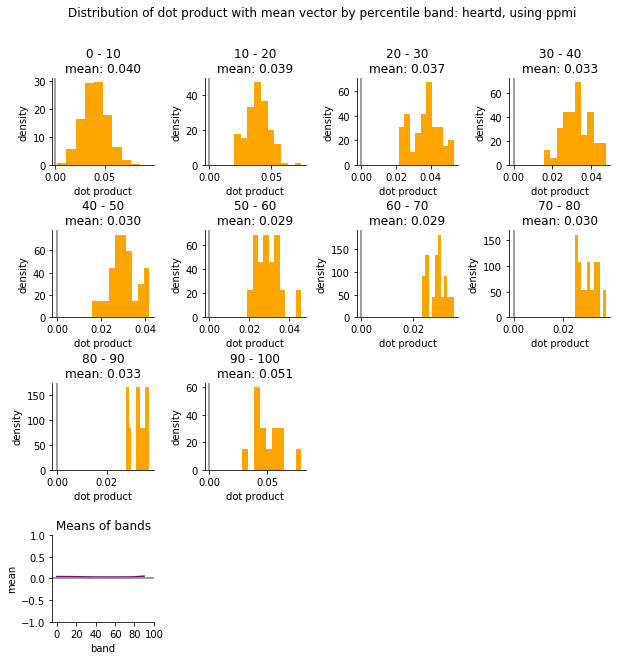

In [5]:
combo = heartd_all
name = 'heartd'

make_link()
VectorCalcs.compare_sims_with_mean(combo,name, step=10)
make_anchor()

## Distribution of values in dimensions

The second geometric aspect that I'll consider from [[1]](#ref1) is the distribution of values within a dimension. What they find is that most dimensions _for sgns_ (it's not clear why they don't discuss glove the way they do for the other properties) have distributions of values that are skewed, i.e. with non-0 medians. While they multiply every value by the sign of the median, thus ensuring that all the skews are positive, I will show the skews as they are, positive and negative, since the point is that the values are skewed within a narrow range.

Here are the results for vfair, showing only the first 10 dimensions with each method as examples. The basic pattern holds for 3 of the 4 methods: most of the dimensions are skewed and the medians fall within a fairly narrow range. They exception is ppmi, where most of the dimensions have little or no skew. One other thing to notice is that sgns and ft have much wider ranges than glove. Finally, we can add that the _overall_ median across dimensions is very close to 0 in all cases.

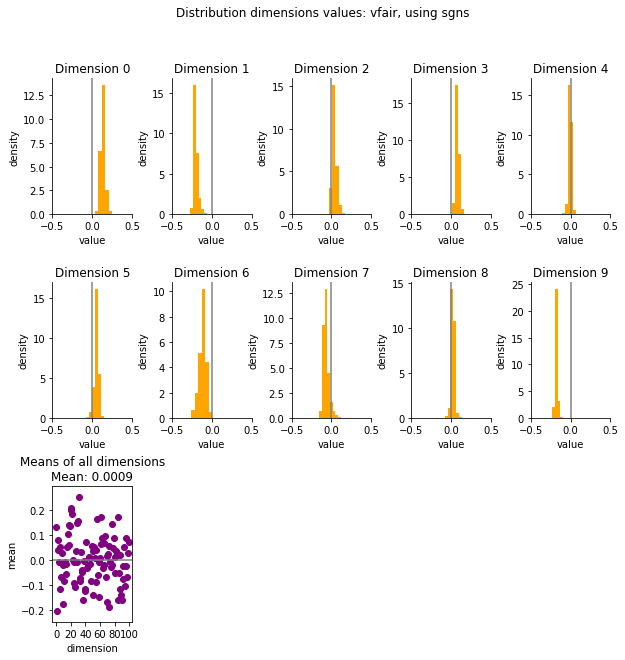

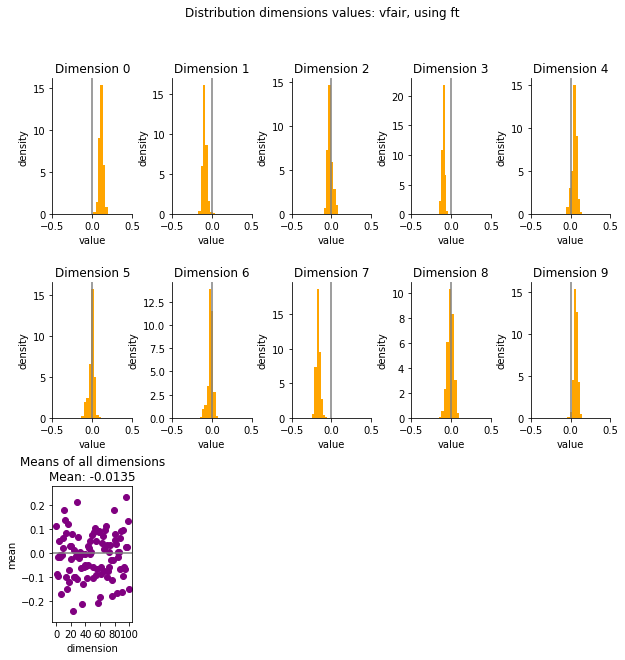

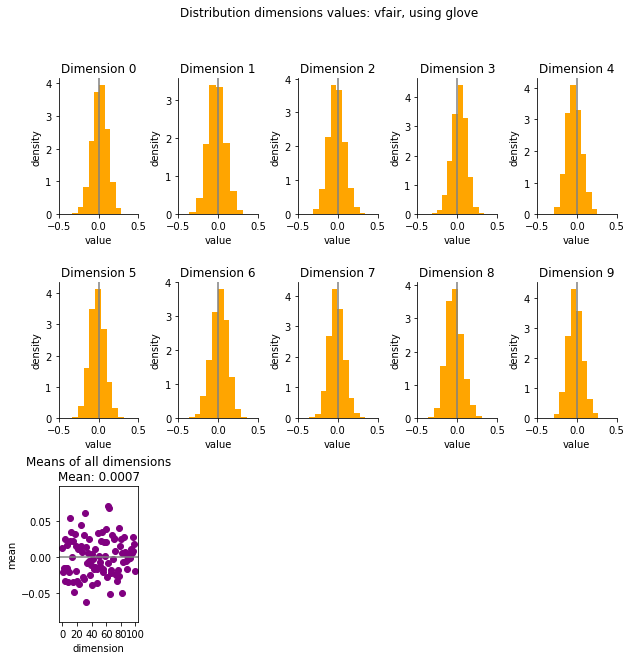

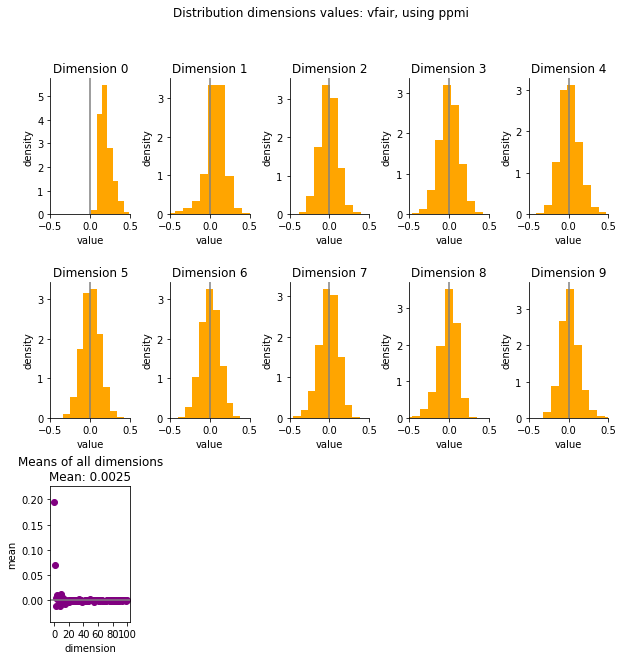

In [6]:
combo = vfair_all
name = 'vfair'

make_link()
VectorCalcs.compare_dims(combo,name,ndims=10)
make_anchor()

Let's try heartd.

The results are very similar to those with vfair. The main difference is that sgns has a smaller range with heartd than it does with vfair. The other 3 methods have roughly similar ranges.

**In sum**, the results with the 4 methods and these two smaller corpora are similar to the results in [[1]](#ref), _except_ that most dimensions in ppmi have very little skew.

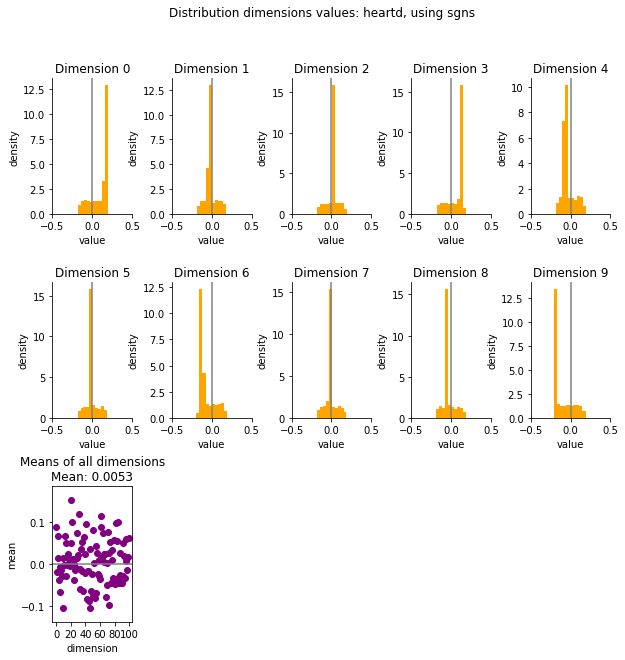

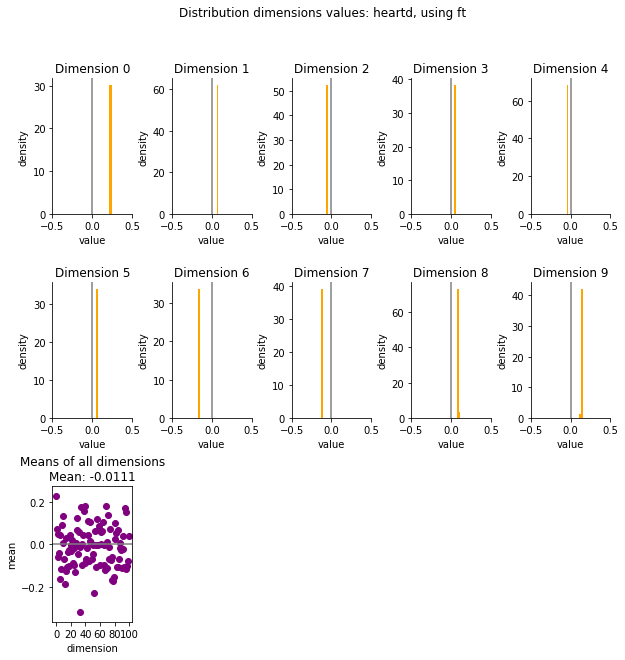

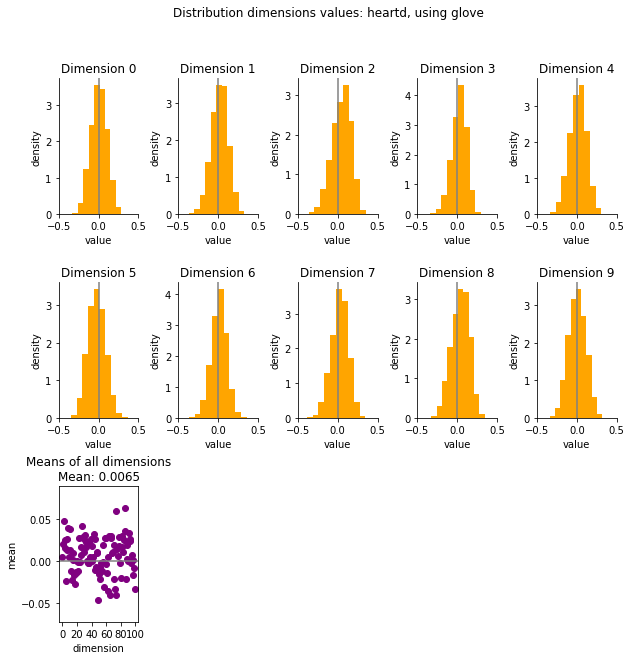

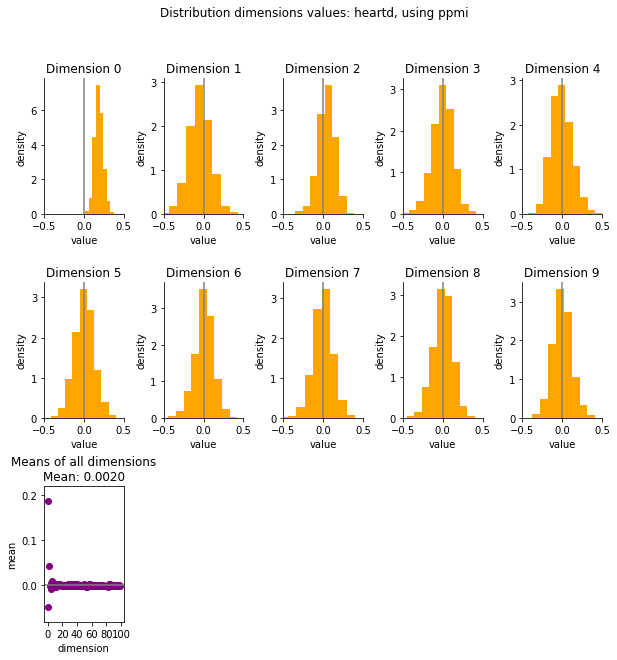

In [7]:
combo = heartd_all
name = 'heartd'

make_link()
VectorCalcs.compare_dims(combo,name,ndims=10)
make_anchor()

## Summary

The main conclusion is that the two phenomena from [[1]](#ref1) hold up pretty well across the methods and with these much smaller corpora. However, one place where there is a difference is that very few ppmi dimensions have much skew in their values, unlike the other 3 methods (and the original results). Finally, once again, sgns and ft largely pattern together, while glove and ppmi do so as well, but to a lesser extent.

[Back to the introduction](dist_freq_intro.html)


## The posts

* [Shifted similarity distributions](dist_freq_sim_shift.html)
* [Similarity stratification](dist_freq_stratification.html)
* [Frequency effects of vectors](dist_freq_vecs.html)
* ➤ Strange geometry
* [Distributional effects and hubs](dist_freq_hubs.html)
* [Recapitulation and next steps](dist_freq_recapit.html)

## References

<span id="ref1">[1]</span> David Mimno and Laure Thompson. 2017. The strange geometry of skip-gram with negative sampling. Proceedings of the 2017 Conference on Empirical Methods in Natural Language Processing, 2873–2878. 
